In [ ]:
#!python -m pip install -U gensim
#!pip install gensim
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 33.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=4f49c26730b5690ca42aca5b8dd67f8cd90fe98ae6e2159013eddb79fcffc315
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=ef9038a8cd889474e138d52500ff69c374a0757d06c0e2870082b188f1648225
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.2 MB/s 


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 65 kB/s 


In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 8.1 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install fasttext

In [ ]:
!pip install fake_useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=73450d5e10480c5688d50d05a7cc9e40e494334edfa5cbaecf0a771227761aeb
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict

import re
import string # библиотека для работы со строками
import nltk   # Natural Language Toolkit

# загружаем библиотеку для лемматизации
import pymorphy2 # Морфологический анализатор

#from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import silhouette_samples
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
#from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

#import xgboost as xgb
#import lightgbm as lgb
from catboost import CatBoostClassifier, CatBoostRegressor

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
#from MulticoreTSNE import MulticoreTSNE as TSNE

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist

from gensim.models import FastText
#import fasttext

from tslearn.clustering import TimeSeriesKMeans

from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import string

import requests

import threading
from threading import Thread
from time import sleep

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [ ]:
def silhouette_plot(data, labels):
  cluster_labels = np.unique(labels)
  n_clusters = cluster_labels.shape[0]

  silhouette_vals = silhouette_samples(data, labels, metric="euclidean")

  y_ax_lower, y_ax_upper = 0, 0
  yticks = []
  for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)

    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor="none", color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

  c_silhouette_avg = np.mean(c_silhouette_vals)
  plt.axvline(c_silhouette_avg, color="red", linestyle="--")
  plt.yticks(yticks, cluster_labels + 1)
  plt.ylabel("Кластер")
  plt.xlabel("Коэф. силуэта")
  plt.show()

In [ ]:
def split_text(text):
    text = text.replace('«', '')
    text = text.replace('»', '')
    text = text.replace('"', '')
    text = text.replace('-', '')
    
    text = text.replace('т. д.', 'т д')
    text = text.replace('т. п.', 'т п')
    text = text.replace('др.', 'др')
    
    text = text.replace('...,', ',')
    text = text.replace('?,', ',')
    text = text.replace('!,', ',')
    text = text.replace('.,', ',')
    text = text.replace('.)', ')')
    text = text.replace(';,', ',')
    
    text = text.replace('....', ';')
    text = text.replace('...', ';')
    text = text.replace('..', ';')
    
    text = text.replace('!', ';')
    text = text.replace('!!', ';')
    text = text.replace('!!!', ';')
    text = text.replace('?', ';')
    text = text.replace('??', ';')
    text = text.replace('???', ';')
    text = text.replace('!?', ';')
    text = text.replace('?!', ';')
    text = text.replace('.', ';')
        
    return [txt.strip() for txt in text.split(';')]

**Загрузка описания психологических векторов.**

In [ ]:
person_vectors = ("brown", "black", "red", "orange", "yellow", "green", "blue", "purple")

In [ ]:
df_vectors = pd.DataFrame([], columns=["description", "vectorId"])

# Загружаем описание личности человека для каждого вектора из книги В.К. Толкачева
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors/" + person_vector + ".txt", encoding="utf8") as rf:
        for sentence in split_text(rf.read().strip()):
            if len(sentence) <= 2: continue
            df_vectors = df_vectors.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)
            
# Загружаем описание личности человека для каждого вектора из книги М.В. Бородянского
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors_/" + person_vector + ".txt", encoding="utf8") as rf:
        #sentences = re.sub(r'\s+', ' ', rf.read(), flags=re.M)
        #for sentence in re.split(r'(?<=[.!?…]) ', sentences):
        for sentence in split_text(rf.read().strip()):
            if len(sentence) <= 2: continue
            df_vectors = df_vectors.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)

In [ ]:
df_vectors_neg = pd.DataFrame([], columns=["description", "vectorId"])

# Загружаем описание личности человека для каждого вектора из книги В.К. Толкачева
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors/" + person_vector + "_neg.txt", encoding="utf8") as rf:        
        for sentence in split_text(rf.read().strip()):
            if len(sentence) <= 2: continue
            df_vectors_neg = df_vectors_neg.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)
            
# Загружаем описание личности человека для каждого вектора из книги М.В. Бородянского
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors_/" + person_vector + "_neg.txt", encoding="utf8") as rf:       
        for sentence in split_text(rf.read().strip()):
            if len(sentence) <= 2: continue
            df_vectors_neg = df_vectors_neg.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True) 

In [ ]:
df_vectors_pos = pd.DataFrame([], columns=["description", "vectorId"])

# Загружаем описание личности человека для каждого вектора из книги В.К. Толкачева
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors/" + person_vector + ".txt", encoding="utf8") as rf:
        with open("drive/MyDrive/vectors/" + person_vector + "_neg.txt", encoding="utf8") as rf_:
            sentences_neg = split_text(rf_.read().strip())
            for sentence in split_text(rf.read().strip()):
                if sentence in sentences_neg:
                  #print(sentence)
                  continue
                if len(sentence) <= 2: continue
                df_vectors_pos = df_vectors_pos.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)
            
# Загружаем описание личности человека для каждого вектора из книги М.В. Бородянского
for person_vector in person_vectors:
    with open("drive/MyDrive/vectors_/" + person_vector + ".txt", encoding="utf8") as rf:
        with open("drive/MyDrive/vectors_/" + person_vector + "_neg.txt", encoding="utf8") as rf_:
            sentences_neg = split_text(rf_.read().strip())
            for sentence in split_text(rf.read().strip()):
                if sentence in sentences_neg:
                  #print(sentence)
                  continue
                if len(sentence) <= 2: continue
                df_vectors_pos = df_vectors_pos.append({"description": sentence, "vectorId": person_vectors.index(person_vector)}, ignore_index=True)

In [ ]:
df_vectors.head()

,description,vectorId
0,"Люди, которых я хотел бы описать, выделяются т...",0
1,"От себя добавим, что есть в этом характере и ч...",0
2,Аккуратность обозначает здесь не только физиче...,0
3,Эти люди обладают морально нравственной чистоп...,0
4,Такой ребенок может ответить по телефону: Мама...,0


In [ ]:
df_vectors.shape

(4562, 2)

In [ ]:
df_vectors_pos.head()

,description,vectorId
0,"Люди, которых я хотел бы описать, выделяются т...",0
1,Аккуратность обозначает здесь не только физиче...,0
2,Эти люди обладают морально нравственной чистоп...,0
3,Такой ребенок может ответить по телефону: Мама...,0
4,Он — классический флегматик (носитель флегмати...,0


In [ ]:
df_vectors_neg.head()

,description,vectorId
0,"От себя добавим, что есть в этом характере и ч...",0
1,По нашему мнению его гнев и мстительность — эт...,0
2,Иногда он может впасть в многолетнюю сутяжную ...,0
3,Иногда это упрямство перерастает в паранойю (п...,0
4,"При бесконечных запретах и наказаниях, угрозах...",0


In [ ]:
# загружаем список стоп-слов для русского
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
word_tokenizer = nltk.WordPunctTokenizer()

In [ ]:
# инициализируем лемматизатор
morph = pymorphy2.MorphAnalyzer()

**Предобработка описания векторов.**

In [ ]:
def words_only(text):
    regex = re.compile("[А-Яа-яA]+")
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [ ]:
# Токенизация
df_vectors["description"] = df_vectors["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

# Удаление стоп-слов
df_vectors["description"] = df_vectors["description"].apply(
    lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

# Лемматизация
df_vectors["description"] = df_vectors["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

In [ ]:
# Токенизация
df_vectors_pos["description"] = df_vectors_pos["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

# Удаление стоп-слов
df_vectors_pos["description"] = df_vectors_pos["description"].apply(
    lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

# Лемматизация
df_vectors_pos["description"] = df_vectors_pos["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

In [ ]:
# Токенизация
df_vectors_neg["description"] = df_vectors_neg["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

# Удаление стоп-слов
df_vectors_neg["description"] = df_vectors_neg["description"].apply(
    lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

# Лемматизация
df_vectors_neg["description"] = df_vectors_neg["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

In [ ]:
df_vectors.head()

,description,vectorId
0,"[человек, который, хотеть, описать, выделяться...",0
1,"[от, добавить, характер, четвёртый, обязательн...",0
2,"[аккуратность, обозначать, физический, чистопл...",0
3,"[этот, человек, обладать, морально, нравственн...",0
4,"[такой, ребёнок, ответить, телефон, мама, сказ...",0


**Построение векторных моделей (TF-IDF, WordToVec).**

**Модель TF-IDF.**

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features = 300)
# Обучаем TF-IDF на train
df_vectors_ = df_vectors.copy()
df_vectors_["description"] = df_vectors_["description"].apply(lambda tokens: ' '.join(tokens))

embedding_train_tfidf = vectorizer.fit_transform(df_vectors_["description"].values)

embedding_train_tfidf.todense()[:1]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

**Класс для вычисления среднего вектора с весами TF-IDF набора слов.**

In [ ]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.popitem()[1])

    def fit(self, X, y=None):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

**Модель WordToVec, обученная на описании векторов.**

In [ ]:
simple_model = Word2Vec(df_vectors["description"].values, vector_size=300, window=5, min_count=5, workers=4)

w2v_simple = dict(zip(simple_model.wv.index_to_key, simple_model.wv.vectors))

tfidfEmbVect_simple = TfidfEmbeddingVectorizer(w2v_simple)

embedding_train_simple = tfidfEmbVect_simple.fit(df_vectors["description"].values).transform(df_vectors["description"].values)
y_train_simple = df_vectors["vectorId"].values.copy().astype(np.int8)

**Модель WordToVec, предобученная с сайта “rusvectores.org” (корпус “Тайга”).**

In [ ]:
model = KeyedVectors.load_word2vec_format('drive/MyDrive/186/model.bin', binary=True) # tayga-func_upos_skipgram_300_5_2019

words = []

for w in model.index_to_key:
    idx = w.index('_')
    words.append(w[:idx])

w2v = dict(zip(words, model.vectors))

tfidfEmbVect = TfidfEmbeddingVectorizer(w2v)

embedding_train = tfidfEmbVect.fit(df_vectors["description"].values).transform(df_vectors["description"].values)
y_train = df_vectors["vectorId"].values.copy().astype(np.int8)

embedding_train_pos = tfidfEmbVect.transform(df_vectors_pos["description"].values)
y_train_pos = df_vectors_pos["vectorId"].values.copy().astype(np.int8)

embedding_train_neg = tfidfEmbVect.transform(df_vectors_neg["description"].values)
y_train_neg = df_vectors_neg["vectorId"].values.copy().astype(np.int8)

**Удаление аномальных значений.**

In [ ]:
dbs = DBSCAN(eps=0.5, min_samples=2, metric="euclidean")

y_dbs = dbs.fit_predict(embedding_train)

In [ ]:
idxs = np.where(y_dbs == -1)[0]
np.unique(y_train[np.where(y_dbs >= 0)], return_counts=True)

(array([0, 3, 4, 6, 7], dtype=int8), array([ 4, 39,  6,  8, 10]))

In [ ]:
print(embedding_train[idxs].shape)
embedding_train.shape

(4495, 300)


(4562, 300)

In [ ]:
# Отбрасываем аномальные значения
embedding_train = embedding_train[idxs]
y_train = y_train[idxs]

**Построение графиков отображений векторов слов в двумерное пространство.**

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random')
embedding_new = tsne.fit_transform(embedding_train)

#pca = PCA(n_components=3)
#embedding_new = pca.fit_transform(embedding_train)

#reducer = umap.UMAP(n_components=2, random_state=42)
#embedding_new = reducer.fit_transform(embedding_train)

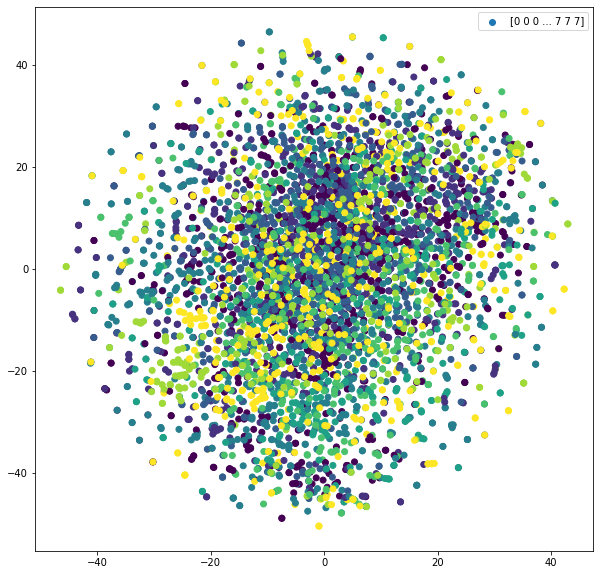

In [ ]:
plt.scatter(embedding_new[:, 0], embedding_new[:, 1], c=y_train, cmap='viridis', label=y_train)
plt.legend()
plt.show()

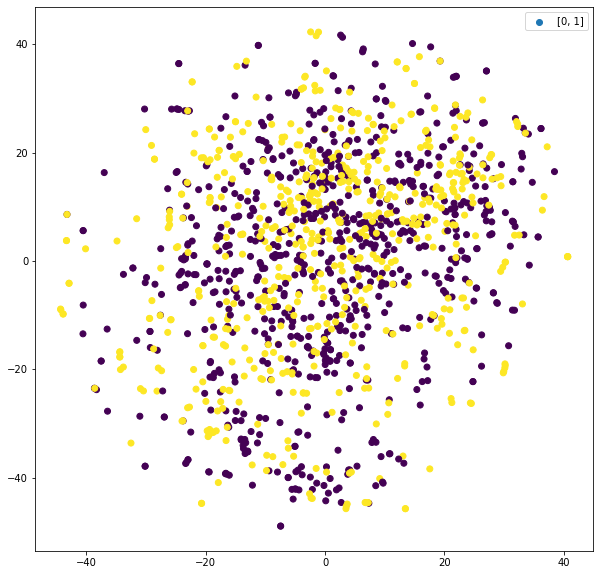

In [ ]:
idxs = np.where((y_train == 0) | (y_train == 1))[0]

plt.scatter(embedding_new[idxs, 0], embedding_new[idxs, 1], c=y_train[idxs], cmap='viridis', label=[0, 1])
plt.legend()
plt.show()

**Построение моделей определения значений векторов личности.**

**Поиск гиперпараметров модели depth и iterations.**

In [ ]:
'''classifier = CatBoostClassifier(loss_function="MultiClass", eval_metric="AUC", custom_metric="F1",
                           random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

gs = GridSearchCV(estimator=classifier,
                  param_grid=[{"iterations": [300, 500, 700, 1000, 1500, 2000, 4000, 5000],
                               "depth": [3, 4, 5]}],
                  scoring="accuracy",
                  verbose=4,
                  cv=5)
gs.fit(embedding_train, y_train)

print(gs.best_score_, gs.best_params_)'''

'classifier = CatBoostClassifier(loss_function="MultiClass", eval_metric="AUC", custom_metric="F1",\n                           random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices=\'0\')\n\ngs = GridSearchCV(estimator=classifier,\n                  param_grid=[{"iterations": [300, 500, 700, 1000, 1500, 2000, 4000, 5000],\n                               "depth": [3, 4, 5]}],\n                  scoring="accuracy",\n                  verbose=4,\n                  cv=5)\ngs.fit(embedding_train, y_train)\n\nprint(gs.best_score_, gs.best_params_)'

**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов TF-IDF.**

In [ ]:
classifier_tfidf = CatBoostClassifier(loss_function="MultiClass", iterations=1000, depth=4, 
                                eval_metric="AUC", custom_metric="F1", 
                                random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

classifier_tfidf.fit(embedding_train_tfidf, y_train_simple)

classifier_tfidf.best_score_

{'learn': {'F1:class=0': 0.576530612244898,
  'F1:class=1': 0.6228571428571428,
  'F1:class=2': 0.5949895615866387,
  'F1:class=3': 0.5571971295905446,
  'F1:class=4': 0.4782608695652174,
  'F1:class=5': 0.5526315789473685,
  'F1:class=6': 0.5611015490533563,
  'F1:class=7': 0.6259067357512954,
  'MultiClass': 1.3241063791470975}}

**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов WordToVec (модель обучена на описании векторов личности).**

In [ ]:
classifier_simple = CatBoostClassifier(loss_function="MultiClass", iterations=4000, depth=4, 
                                eval_metric="AUC", custom_metric="F1", 
                                random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

classifier_simple.fit(embedding_train_simple, y_train_simple)

classifier_simple.best_score_

{'learn': {'F1:class=0': 0.8768074031231926,
  'F1:class=1': 0.9072681704260651,
  'F1:class=2': 0.8753269398430689,
  'F1:class=3': 0.8986834573554665,
  'F1:class=4': 0.87018544935806,
  'F1:class=5': 0.8910648714810282,
  'F1:class=6': 0.8870292887029287,
  'F1:class=7': 0.8926237161531279,
  'MultiClass': 0.9672360581041691}}

**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов WordToVec (предобученная модель с сайта “rusvectores.org”).**

In [ ]:
classifier = CatBoostClassifier(loss_function="MultiClass", iterations=4000, depth=5, 
                                eval_metric="AUC", custom_metric="F1", 
                                random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

classifier.fit(embedding_train, y_train)

classifier.best_score_

{'learn': {'F1:class=0': 1.0,
  'F1:class=1': 1.0,
  'F1:class=2': 1.0,
  'F1:class=3': 1.0,
  'F1:class=4': 1.0,
  'F1:class=5': 1.0,
  'F1:class=6': 1.0,
  'F1:class=7': 1.0,
  'MultiClass': 0.14536177888578808}}

**Построение моделей определения позитивности векторов личности.**

**Модель регрессии CatBoostRegressor, обученная на значениях векторов слов WordToVec (предобученная модель с сайта “rusvectores.org”).**

**Поиск гиперпараметров модели depth и iterations.**

In [ ]:
'''
regressors = []
for vectorId in range(len(person_vectors)):
    idxs1 = np.where(y_train_pos == vectorId)[0]
    idxs2 = np.where(y_train_neg == vectorId)[0]
    
    embedding_train_ = np.concatenate( (embedding_train_pos[idxs1] , embedding_train_neg[idxs2]), axis=0)
    y_train_ = np.concatenate( (np.full(len(idxs1), 1.0), np.full(len(idxs2), 0.)) )

    regressor = CatBoostRegressor(loss_function="RMSE", eval_metric="RMSE", custom_metric="MAE", 
                                    random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

    gs = GridSearchCV(estimator=regressor,
                      param_grid=[{"iterations": [500, 1000, 1500, 2000, 2500, 3000],
                               "depth": [3, 4, 5]}],
                      scoring="neg_root_mean_squared_error",
                      verbose=4,
                      cv=5)
    gs.fit(embedding_train, y_train)

    print(vectorId, gs.best_score_, gs.best_params_)
'''

'\nregressors = []\nfor vectorId in range(len(person_vectors)):\n    idxs1 = np.where(y_train_pos == vectorId)[0]\n    idxs2 = np.where(y_train_neg == vectorId)[0]\n    \n    embedding_train_ = np.concatenate( (embedding_train_pos[idxs1] , embedding_train_neg[idxs2]), axis=0)\n    y_train_ = np.concatenate( (np.full(len(idxs1), 1.0), np.full(len(idxs2), 0.)) )\n\n    regressor = CatBoostRegressor(loss_function="RMSE", eval_metric="RMSE", custom_metric="MAE", \n                                    random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices=\'0\')\n\n    gs = GridSearchCV(estimator=regressor,\n                      param_grid=[{"iterations": [500, 1000, 1500, 2000, 2500, 3000],\n                               "depth": [3, 4, 5]}],\n                      scoring="neg_root_mean_squared_error",\n                      verbose=4,\n                      cv=5)\n    gs.fit(embedding_train, y_train)\n\n    print(vectorId, gs.best_score_, gs.best_params

In [ ]:
regressors = []
for vectorId in range(len(person_vectors)):
    idxs1 = np.where(y_train_pos == vectorId)[0]
    idxs2 = np.where(y_train_neg == vectorId)[0]
    
    embedding_train_ = np.concatenate( (embedding_train_pos[idxs1] , embedding_train_neg[idxs2]), axis=0)
    y_train_ = np.concatenate( (np.full(len(idxs1), 1.0), np.full(len(idxs2), 0.)) )

    regressor = CatBoostRegressor(loss_function="RMSE", iterations=2000, depth=5, 
                                    eval_metric="R2", custom_metric="MAE", 
                                    random_seed=42, logging_level="Silent", use_best_model=False)#, task_type="GPU", devices='0')

    regressor.fit(embedding_train_, y_train_)
    
    regressors.append(regressor)

    print(vectorId, regressor.best_score_)

0 {'learn': {'MAE': 0.007225091788133233, 'R2': 0.9773925706082487, 'RMSE': 0.036159791417882864}}
1 {'learn': {'MAE': 0.004392263477827712, 'R2': 0.9996638552929737, 'RMSE': 0.006339664402754468}}
2 {'learn': {'MAE': 0.0013855749769371944, 'R2': 0.9999259644828086, 'RMSE': 0.0019277319630635816}}
3 {'learn': {'MAE': 0.00529151264837859, 'R2': 0.9993092863921189, 'RMSE': 0.007704362586173083}}
4 {'learn': {'MAE': 0.0007684157078140667, 'R2': 0.999985675008745, 'RMSE': 0.0010664585783143187}}
5 {'learn': {'MAE': 0.0016347531355633072, 'R2': 0.9999302949436579, 'RMSE': 0.0023026885326683606}}
6 {'learn': {'MAE': 0.0009646067262113968, 'R2': 0.9999810001187719, 'RMSE': 0.0013076655958357572}}
7 {'learn': {'MAE': 0.0023045549371649965, 'R2': 0.9998569002797559, 'RMSE': 0.0032335370528572766}}


**Выбор лучшей модели классификации для определения значений векторов личности.**

**Загрузка и предобработка тестовых данных.**

In [ ]:
df_text = pd.DataFrame([], columns=["description"])

with open("drive/MyDrive/test/Дарвин.txt", encoding="utf8") as rf:
    for sentence in split_text(rf.read().strip()):
        if len(sentence) <= 2: continue
        df_text = df_text.append({"description": sentence}, ignore_index=True)

In [ ]:
# Токенизация
df_text["description"] = df_text["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

# Удаление стоп-слов
df_text["description"] = df_text["description"].apply(
    lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

# Лемматизация
df_text["description"] = df_text["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

In [ ]:
df_text.head(10)

,description
0,"[спасибо, скачать, книга, бесплатный, электрон..."
1,"[ru, всё, книга, автор, этот, книга, другой, ф..."
2,"[чарлзти, дарвин, воспоминание, о, развитие, м..."
3,"[я, приходиться, слышать, отец, мнение, челове..."
4,"[не, обстоять, дело, я, ибо, самый, ранний, мо..."
5,"[мой, мать, умереть, июль, г, немногое, восемь..."
6,"[думать, это, забвение, мой, воспоминание, воз..."
7,"[весною, год, отдать, школа, приходящий, учени..."
8,"[до, начать, ходить, школа, я, заниматься, сес..."
9,"[я, рассказывать, проявлять, учение, гораздо, ..."


**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов TF-IDF.**

In [ ]:
# Обучаем TF-IDF
df_text_ = df_text.copy()
df_text_["description"] = df_text_["description"].apply(lambda tokens: ' '.join(tokens))

embedding_test_tfidf = vectorizer.fit_transform(df_text_["description"].values)

predict_proba = classifier_tfidf.predict_proba(embedding_test_tfidf)

for idx, vector in enumerate(np.mean(predict_proba, axis=0)):
    print("{:.3f}".format(vector), "-", person_vectors[idx])

0.158 - brown
0.130 - black
0.108 - red
0.225 - orange
0.079 - yellow
0.092 - green
0.091 - blue
0.116 - purple


**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов WordToVec (модель обучена на описании векторов личности).**

In [ ]:
embedding_test_simple = tfidfEmbVect_simple.transform(df_text["description"].values)

predict_proba = classifier_simple.predict_proba(embedding_test_simple)

for idx, vector in enumerate(np.mean(predict_proba, axis=0)):
    print("{:.3f}".format(vector), "-", person_vectors[idx])

0.184 - brown
0.137 - black
0.120 - red
0.176 - orange
0.082 - yellow
0.100 - green
0.079 - blue
0.123 - purple


**Модель многклассовой классификации CatBoostClassifier, обученная на значениях векторов слов WordToVec (предобученная модель с сайта “rusvectores.org”).**

In [ ]:
embedding_test = tfidfEmbVect.transform(df_text["description"].values)

predict_proba = classifier.predict_proba(embedding_test)

arr_vectors_man = []
for idx, vector in enumerate(np.mean(predict_proba, axis=0)):
    arr_vectors_man.append(vector)
    factor_positive = np.mean(regressors[idx].predict(embedding_test))
    print("{:.3f}".format(vector), "-", person_vectors[idx], "{:.3f}".format(factor_positive))

for idx in range(len(person_vectors)):
    factor_positive = np.mean(regressors[idx].predict(embedding_test))
    arr_vectors_man.append(factor_positive)

0.274 - brown 0.935
0.116 - black 0.880
0.155 - red 0.954
0.147 - orange 0.902
0.053 - yellow 0.919
0.092 - green 0.895
0.056 - blue 0.914
0.107 - purple 0.936


In [ ]:
labels_pred = classifier.predict(embedding_test)
np.unique(labels_pred, return_counts=True)[1] / len(labels_pred)

array([0.44768311, 0.0754858 , 0.14947683, 0.1367713 , 0.01943199,
       0.05829596, 0.02242152, 0.09043348])

**Проверка моделей на текстовых данных разных тем.**

In [ ]:
def getPageLinks(keyword, page_number):  
    # Запрашиваем данные
    response = requests.get('https://www.labirint.ru/search/' + keyword + '/',
                            params={'page': page_number},
                            headers={'User-Agent': UserAgent().chrome})
    
    if not response.ok: return [ (keyword, '') ] 
    
    # Получаем содержимое страницы и переводим в суп
    soup = BeautifulSoup(response.content,'html.parser')
    
    # Находим ссылки
    list_div = soup.findAll('div', attrs={'class': 'product need-watch '})

    links = [ (keyword, 'https://www.labirint.ru' + div.find('a', attrs={'class': 'cover'}).attrs['href']) for div in list_div]
    
    return links

In [ ]:
def getDescription(link):  
    # Запрашиваем данные
    response = requests.get(link, headers={'User-Agent': UserAgent().chrome})
    
    if not response.ok: return '' 
    
    # Получаем содержимое страницы
    soup = BeautifulSoup(response.content,'html.parser')

    # Описание книги (фильма)
    annotation = soup.find('div', attrs={'id': 'fullannotation'})

    if annotation == None: return ''

    return ' '.join([s for s in annotation.p.stripped_strings])

**Скачиваем с сайта “labirint.ru” описания книг по 3-м темам.**

In [ ]:
kwords = ['ужас', 'любовь']#['кулинар', 'художник', 'бизнес'] #['ужас', 'любовь']
# Находим ссылки всех страниц
links = []
for kword in kwords:
  for page_num in range(1, 18, 1):
    links_ = getPageLinks(kword, page_num)
    if len(links_) == 0: break
    sleep(0.01)
    links += links_

links = list(set(links))   # Удаляем повторяющиеся, если есть

In [ ]:
links[: 10]

[('ужас', 'https://www.labirint.ru/books/2323/'),
 ('любовь', 'https://www.labirint.ru/books/655353/'),
 ('ужас', 'https://www.labirint.ru/books/819805/'),
 ('любовь', 'https://www.labirint.ru/books/840775/'),
 ('ужас', 'https://www.labirint.ru/books/770158/'),
 ('ужас', 'https://www.labirint.ru/books/719205/'),
 ('ужас', 'https://www.labirint.ru/books/838283/'),
 ('ужас', 'https://www.labirint.ru/books/153232/'),
 ('любовь', 'https://www.labirint.ru/books/842973/'),
 ('ужас', 'https://www.labirint.ru/multimedia/349421/')]

In [ ]:
lock = threading.Lock()

In [ ]:
def build_data(links, texts, labels, idx_start, idx_end):
    for link in links[idx_start : idx_end]:
        if link[1] == '': continue
        descr = getDescription(link[1])

        lock.acquire()

        labels.append(link[0])      
        texts.append(descr)

        lock.release()

        sleep(0.01)

In [ ]:
texts = []; labels = []

count = len(links) // 10             # Разбиваем чтение данных на 10 + 1 потоков

cur_count = 0
for idx in range(count, len(links), count):
    cur_count = idx
    th = Thread(target=build_data, args=(links, texts, labels, idx - count, idx))
    th.start()

if cur_count != len(links):
    th = Thread(target=build_data, args=(links, texts, labels, cur_count, len(links)))
    th.start()

print('Всего ссылок: ', len(links))

while len(texts) != len(links):
  sleep(30)
  print('Прочитано ссылок: ', len(texts))

Всего ссылок:  1991
Прочитано ссылок:  75
Прочитано ссылок:  163
Прочитано ссылок:  236
Прочитано ссылок:  322
Прочитано ссылок:  404
Прочитано ссылок:  485
Прочитано ссылок:  567
Прочитано ссылок:  654
Прочитано ссылок:  741
Прочитано ссылок:  825
Прочитано ссылок:  909
Прочитано ссылок:  990
Прочитано ссылок:  1070
Прочитано ссылок:  1151
Прочитано ссылок:  1227
Прочитано ссылок:  1312
Прочитано ссылок:  1393
Прочитано ссылок:  1478
Прочитано ссылок:  1558
Прочитано ссылок:  1639
Прочитано ссылок:  1716
Прочитано ссылок:  1803
Прочитано ссылок:  1887
Прочитано ссылок:  1971
Прочитано ссылок:  1991


In [ ]:
# Удаляем данные без описания
print('Кол-во ссылок: ', len(texts))

texts_ = texts[:]
labels_ = labels[:]

texts = []; labels = []

for idx, text in enumerate(texts_):
   if text == '': continue
   texts.append(text)
   labels.append(labels_[idx])
   
texts = np.array(texts)

print('Кол-во ссылок с данными: ', len(texts))

Кол-во ссылок:  1991
Кол-во ссылок с данными:  454


In [ ]:
# Преобразуем тестовые метки в числовые
labels = np.array(labels)
for kword in kwords:
    labels[labels == kword] = kwords.index(kword)
labels = labels.astype(np.int8)

np.unique(labels, return_counts=True)

(array([0, 1], dtype=int8), array([259, 195]))

In [ ]:
texts[:5]

array(['"Ведьмины качели" Чего только не рассказывают про старый дом, где проводят каникулы Мишка и его сестры! Говорят, и привидения там водятся, и ведьма живет са\xadмая настоящая. Глупо, конечно, принимать эти россказни всерьез, но когда из-за таинственной двери тянется высохшая рука, по полу расползаются щупальца тумана, за окном взывают из трясины утопленники, а самый обыкновенный душ превращается в злобное чудовище - поверишь и не та\xadкому. Не в силах бороться с наваждением, ребята решают бежать из западни, и вот тут начинается настоящий кошмар... "Ключ от царства мрака" Мишка и его сестренка Александра постепенно поняли: они живут в страшном доме, наполненном кошмарами. Один из них брату с сестрой уда\xadлось победить. Однако победа досталась дорогой иеной - неизвестный парень, который называл себя Странником, шагнул во мрак, спасая жизни ребят. Никто не знал о его дальнейшей судьбе. А потому Мишка и Александра были очень рады, когда тот вернулся... Однако радость была недолго

In [ ]:
labels[:5]

array([0, 0, 0, 0, 0], dtype=int8)

**Переводим текстовые описания книг в вектора личности, используя построенные модели многоклассовой классификации и регрессии на основе значений векторов, вычисленных предобученной моделью WordToVec.**

In [ ]:
arr_vectors = []

for text in texts:
    df_texts = pd.DataFrame([], columns=["description"])

    for sentence in split_text(text.strip()):
        if len(sentence) <= 2: continue
        df_texts = df_texts.append({"description": sentence}, ignore_index=True)

    # Токенизация
    df_texts["description"] = df_texts["description"].apply(lambda txt: word_tokenizer.tokenize(txt))

    # Удаление стоп-слов
    df_texts["description"] = df_texts["description"].apply(
        lambda tokens: [word.lower() for word in tokens if (word not in string.punctuation and word not in stop_words and word.isalpha())])

    # Лемматизация
    df_texts["description"] = df_texts["description"].apply(lambda txt: [morph.parse(word)[0].normal_form for word in txt])

    embedding_test = tfidfEmbVect.transform(df_texts["description"].values)  # Векторное представление слов

    predict_proba = classifier.predict_proba(embedding_test)

    vectors = []
    for vector in np.mean(predict_proba, axis=0):
        vectors.append(vector)  # Вектор личности

    for idx in range(len(person_vectors)):
        factor_positive = np.mean(regressors[idx].predict(embedding_test))
        vectors.append(factor_positive)     # Позитивность вектора

    arr_vectors.append(vectors)

arr_vectors = np.array(arr_vectors)

**Графики отображения векторов личности и позитивности векторов в двумерное пространство.**

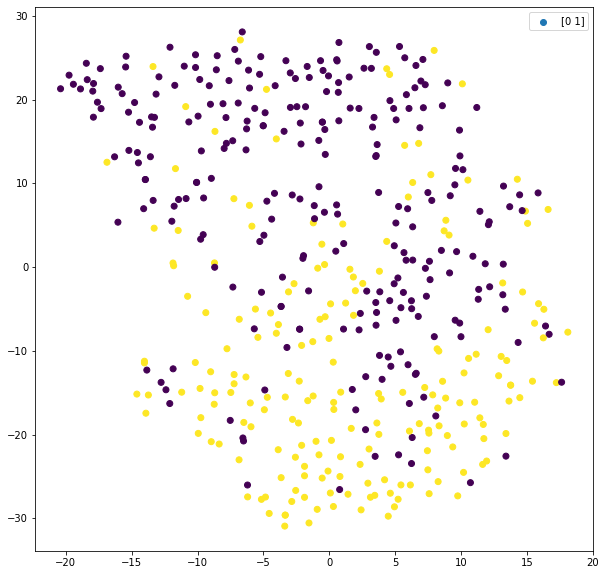

In [ ]:
#pca = PCA(n_components=2)
#embedding = pca.fit_transform(arr_vectors)

##reducer = umap.UMAP(n_components=2, random_state=42)
#embedding = reducer.fit_transform(arr_vectors)

tsne = TSNE(n_components=2, learning_rate='auto', init='random')
embedding = tsne.fit_transform(arr_vectors)

plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', label=np.unique(labels))
plt.legend()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]

In [ ]:
dbs = DBSCAN(eps=0.15, min_samples=2, metric="euclidean")

y_pred = dbs.fit_predict(arr_vectors)

In [ ]:
np.unique(y_pred, return_counts=True)

(array([-1,  0]), array([ 11, 443]))

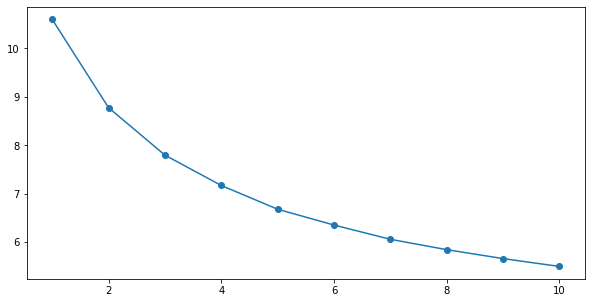

In [ ]:
distortions = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init=20, max_iter=300, random_state=0)

  kmeans.fit(arr_vectors)

  distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.show()

In [ ]:
n_clusters = 2

In [ ]:
#km = KMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=0)
#y_pred = km.fit_predict(arr_vectors)

ts_kmeans = TimeSeriesKMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=0, metric="euclidean")
y_pred = ts_kmeans.fit_predict(arr_vectors)


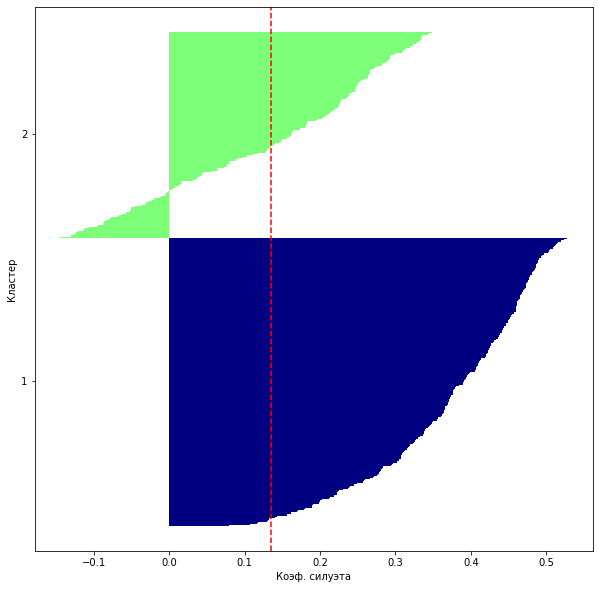

In [ ]:
silhouette_plot(arr_vectors, y_pred)

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([265, 189]))

**Графики векторов и текстовые описания книг в каждом кластере (600 символов описания книги).**

Кластер 1


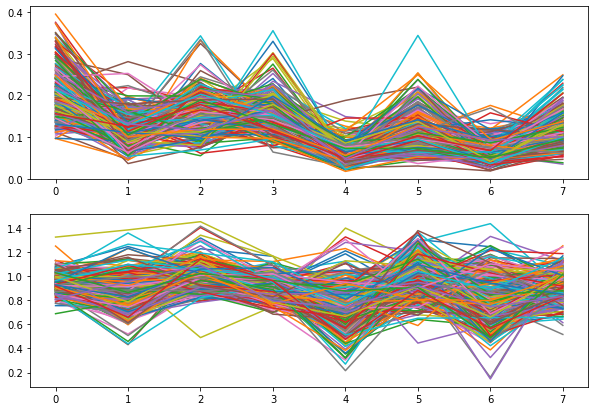

График векторов личности (вверху), график позитивности векторов (внизу)
Истинные метки:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Предсказанные метки:
 [0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1
 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 

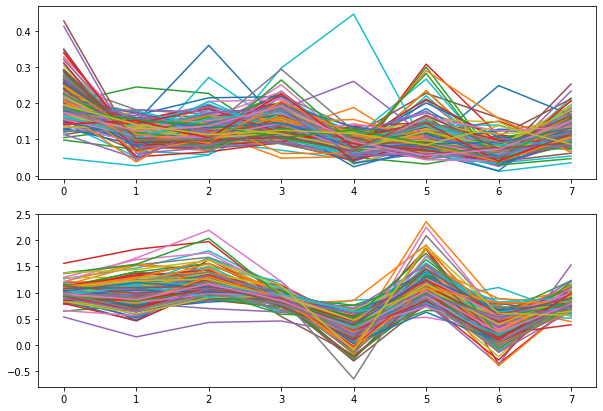

График векторов личности (вверху), график позитивности векторов (внизу)
Истинные метки:
 []
Предсказанные метки:
 []
accuracy - nan 

Accuracy: 0.2775330396475771


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
indexes = [0, 2, 1] # Индексы соответствия идентиф. вектора в кластере и идентиф. вектора в исходных данных

labels_ = labels.copy()
for cluster_id in range(n_clusters):
    print('Кластер ' + str(cluster_id + 1))
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
    for vectors in arr_vectors[ np.where(y_pred == cluster_id)[0] ]:
        ax1.plot(vectors[:8])
        ax2.plot(vectors[8:])        
    plt.show()
    print('График векторов личности (вверху), график позитивности векторов (внизу)')

    idxs = np.where(labels == indexes[cluster_id])[0]

    y_true_cluster = labels[idxs]                # Истинные метки
    y_true_cluster[:] = cluster_id
    print('Истинные метки:\n', y_true_cluster)
    y_pred_cluster = y_pred[idxs]                # Предсказанные метки
    print('Предсказанные метки:\n', y_pred_cluster)
    labels_[idxs] = cluster_id                      

    accuracy = accuracy_score(y_true_cluster, y_pred_cluster)
    print('accuracy -', accuracy, '\n')

    df_data = pd.DataFrame(texts[idxs], columns=['text'])
    for data in df_data.values[: 7]:
        print(data[0][:200])
        print(data[0][200:400])
        print(data[0][400:600], '\n')

print('Accuracy:', accuracy_score(y_pred, labels_))

In [ ]:
for idx, vectors in enumerate(arr_vectors):
    if vectors[9] < 0.7: print(idx)

5
9
11
40
48
58
59
62
66
78
80
93
109
113
115
126
127
130
131
155
176
179
190
192
196
200
203
206
207
209
217
224
229
232
237
247
249
263
269
275
280
287
293
297
305
308
330
331
335
340
352
370
381
391
410
425
429
433
445
450
451


In [ ]:
texts[52]

'Эволюция ужаса! Джонатан Таккер, Джена Мэлоун, Лаура Рэмси в триллере Картера Смита! Они отправились в увеселительную поездку… но очередная остановка оказалась смертельным тупиком. Группа друзей приехала осмотреть нетронутую временем пирамиду индейцев майя и угодила в ловушку, где притаилось древнее зло, затянувшее героев в пучину ужаса и отчаяния. Смотрите один из самых шокирующих триллеров года - финал поразит вас до глубины души, и вы уже никогда не сможете спать спокойно. Дополнительные материалы: Комментарии режиссера Картера Смита и монтажера Джеффа Бетанкура Вырезанные эпизоды с комментариями режиссера Картера Смита и монтажера Джеффа Бетанкура Как создавался фильм Ползучая смерть Создание спецэффектов Трейлер Оригинальное название: The Ruins. США, 2008 г. Жанр: ужасы, триллер. Режиссер: Картер Смит. В ролях: Джонатан Такер ("Пульс"), Джена Мэлоун ("Мачеха"), Лаура Рэмси ("Сделка с дьяволом"), Шон Эшмор, Джо Андерсон, Серхио Кальдерон, Джесси Рамирез, Балдер Морено, Димитрий Ба

In [ ]:
np.argmax(cosine_similarity(np.array(arr_vectors_man)[np.newaxis, :], arr_vectors))

70

Кратко из книги В.К. Толкачева:

Зеленый вектор:
Настоящая реальность — это мир яркого света. Отсюда театральность, яркость, демонстративность в поведении визуального типа, некоторый драматизм и острота всех его переживаний, ибо это «первичные» переживания, связанные с пересечением некоторой новой границы в восприятии. В дальнейшем для этого визуального типа становятся бессознательно желанными просто вспышки света, новое, неожиданное сочетание красок, цветов, оттенков, того, что видится, чем можно наслаждаться вновь и вновь, что придает жизни яркость ощущений.

Красный вектор:
Вечный «искатель приключений и завоеватель». Он раб идеи. Его путь к признанию проложен через осуществление чего-нибудь совершенно грандиозного и уникального, например, через восхождение на самую высокую гору или пересечение океана на плоту без весел и со связанными руками. Такое свершение, по его мнению, затмит всех претендентов на первое место. Он уверен, что всегда добьется аплодисментов, если дольше всех продержится на верхушке флагштока, или станет первым европейцем, который ступил на какую нибудь землю, или пройдет над водопадом по натянутой веревке. Все эти деяния выглядят очень заманчиво, но, конечно, до тех пор, пока они не достигнуты, и искатель приключений вдруг обнаруживает, что покорение очередной вершины ему ничего не дало. Тогда он изобретает себе новый достойный подвиг, который станет пропуском в вечность.

Оранжевый вектор: Самодисциплина для него не в тягость, в комнате на стене висит режим дня. Дисциплина становится для него психически прирожденным фактором; самоистязание себя дисциплиной — это тоже один из способов существования в этой жизни. План, режим — залог успеха! Моего и, следовательно, Вашего. Ослушаться его невозможно! Зачастую им характерен подвиг великомучеников, подвиг самоотречения. Латентный мазохизм делает их сверхисполнительными, готовыми «разбить лоб» ради исполнения долга. Для них актуально понятие «нести свой крест».

Синий вектор:
Он слышит ритмику слова. Речь, ритмически законченная, становится необходимой формой существования. Он — звуковик, поэт, организм которого не может нормально функционировать без поэзии. Он пишет стихи не для нас, а для себя. Вдохновение приходит не всегда, но его можно достичь искусственно, например, съев мухомор. Надо привести себя в необычное биохимическое состояние, и тогда стихи появятся сами собой.
Они истинные меломаны. Только они способны оценить музыку и мир звуков во всей его полноте и многообразии. Музыка доставляет им глубокое наслаждение.

Желтый вектор:
Они — прекрасные кулинары.
Он — ест много, но разнообразно; он все пробует на вкус.
Что может быть приятнее ощущений, исходящих из переполненного вкуснятиной желудка и чувства приятной дремы, охватывающей организм? Не в этом ли смысл жизни? Качество жизни наиболее точно измеряется количеством выпитого пива!